<Axes: >

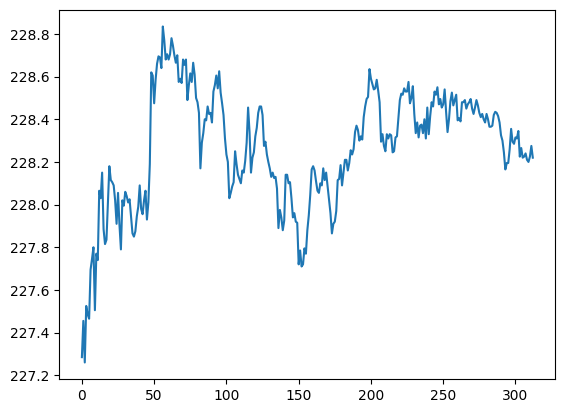

In [5]:
import psycopg2
import pandas as pd

DB_HOST = 'localhost'
DB_NAME = 'us'
DB_USER = 'postgres'
DB_PASS = 'buddyrich134'
conn = psycopg2.connect(host=DB_HOST, dbname=DB_NAME, user=DB_USER, password=DB_PASS)
cursor = conn.cursor()
cursor.execute("SELECT da, cl from stock_price where code = 'AAPL' order by da asc;")
conn.commit()
df = cursor.fetchall()
df = pd.DataFrame(df, columns=['da', 'cl'])
df.iloc[:, 1].plot()

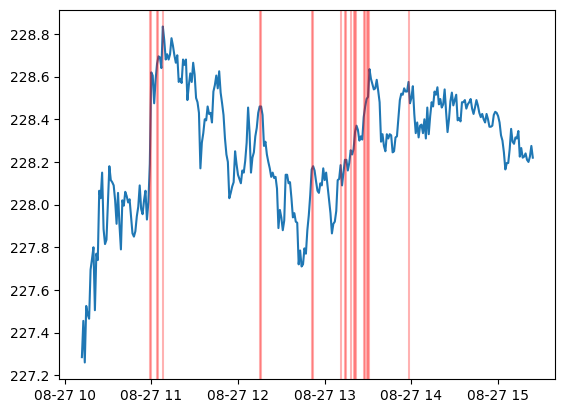

In [20]:
import matplotlib.pyplot as plt
df['vol'] = df['cl']
df['prevHigh'] = df['cl'].rolling(20).max().shift(1)
df['prevVolHigh'] = df['vol'].rolling(20).max().shift(1)
df['signal1'] = df['cl'] >= df['prevHigh']
df['signal2'] = df['vol'] >= df['prevVolHigh']
plt.plot(df['da'],df['cl'])
for da in df[(df['signal1']) & (df['signal2'])].iloc[:, 0]:
    plt.axvline(da, color='red', alpha=0.3)
